<a href="https://colab.research.google.com/github/ahan-2000/NLP-Stock-Sentiment-Analysis/blob/main/Stock_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [2]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")

In [6]:
#If label =1 stock increase, if label=0 stock price either remained same/decreased. 
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [7]:
#Train-Test Split

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [8]:
data=train.iloc[:,2:27]
data.replace('[^a-zA-Z]',' ', regex=True, inplace= True) #Other than a-z everything will be blank

In [9]:
#Replacing column names for our ease

list1=[ i for i in range(25)]
new_index=[str(i) for i in list1]
data.columns=new_index
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jai

In [10]:
#Converting all the charecters into small 

for index in new_index:
  data[index]=data[index].str.lower()

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,hammers hand robson a youthful lesson,saints party like it s,wear wolves have turned into lambs,stump mike catches testy gough s taunt,langer escapes to hit,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,a tale of two tails,i say what i like and i like what i say,elbows eyes and nipples,task force to assess risk of asteroid collision,how i found myself at last,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,pele turns up heat on ferguson,party divided over kohl slush fund scandal,manchester united england,women in record south pole walk,vasco da gama brazil,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,our choice not theirs,profile of former us nazi party officer willia...,new evidence shows record of war crimes suspec...,the rise of the supernerds,written on the body,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,met faces fresh attack on race crime,everton fans top racist league of shame,our breasts ourselves,russia s new boss has an extremely strange his...,always and forever,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jai

In [11]:
#These are in headline form but we need into 1 para to apply our models of NLP thus creating para for each

headlines=[]
for row in range(0, len(data.index)):
  headlines.append(''.join(str(x) for x in data.iloc[row, 0:25]))

In [12]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reportsscorecardhughes  instant hit buoys bluesjack gets his skates on at ice cold alexchaos as maracana builds up for uniteddepleted leicester prevail as elliott spoils everton s partyhungry spurs sense rich pickingsgunners so wide of an easy targetderby raise a glass to strupar s debut doublesouthgate strikes  leeds pay the penaltyhammers hand robson a youthful lessonsaints party like it s     wear wolves have turned into lambsstump mike catches testy gough s tauntlanger escapes to hit    flintoff injury piles on woe for englandhunters threaten jospin with new battle of the sommekohl s successor drawn into scandalthe difference between men and womensara denver  nurse turned solicitordiana s landmine crusade put tories in a panicyeltsin s resignation caught opposition flat footedrussian roulettesold outrecovering a title'

In [14]:
#Creating the Bag of Words (Importing)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [16]:
#Bag of Words

cv=CountVectorizer(ngram_range=(2,2)) 
traindataset=cv.fit_transform(headlines)

In [17]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = cv.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [20]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[141  45]
 [  8 184]]
0.8597883597883598
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       186
           1       0.80      0.96      0.87       192

    accuracy                           0.86       378
   macro avg       0.87      0.86      0.86       378
weighted avg       0.87      0.86      0.86       378



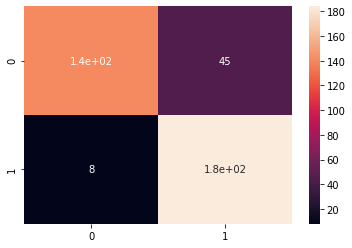

In [21]:
import seaborn as sns
sns.heatmap(matrix, annot=True)
